# Tarea - Caminata aleatoria

#### 1. Simulación del movimiento browniano

El movimiento browniano es el movimiento aleatorio que se observa en las partículas que se hallan en un medio fluido, como resultado de choques contra las moléculas de dicho fluido [(referencia)].

[(referencia)]: https://es.wikipedia.org/wiki/Movimiento_browniano

Para simular el movimiento, en lugar de usar las ecuaciones integro-diferenciales que describe Einstein, use una caminta aleatoria para los tres ejes $x$, $y$, $z$ de la siguiente forma
$$
W_i=W_{i-1}+X_i\sqrt{\Delta t}
$$
donde, $\Delta t$ es un intervalo de tiempo y 
$$
X_i=\left\{\begin{array}{l}
1\\
-1
\end{array}\right.,
$$
se escoge de forma aleatoria con la misma probabilidad.

Simule $10$ segundos con un $\Delta t=0.001$ y represéntelo en un gráfico 3D.

In [77]:
# t = [0]*10000
# len(t) ejercicio de asesoria para entender tamaño de lista
 
import numpy as np
import matplotlib.pyplot as plt

delta_t = 0.001 
t = 10  # tiempo a simular
muestra = int( t / delta_t)  
muestra

10000

In [234]:
# Se le da un valor correspondiente a la lista, asi tienen el tamaño necesario
x_valor = [0] * muestra
y_valor = [0] * muestra
z_valor = [0] * muestra

# Wikipedia: El movimiento browniano es el movimiento aleatorio que se observa en las partículas que se hallan en un medio fluido
# Movimiento browniano requiere valores aleatorios

for i in range(1, muestra):
    x_for = np.random.choice([-1,1])
    y_for = np.random.choice([-1,1])
    z_for = np.random.choice([-1,1])

    Xi = x_for * np.sqrt(delta_t) # Calcular nuevos valores para x_valor
    Yi = y_for * np.sqrt(delta_t) # Calcular nuevos valores para y_valor
    Zi = z_for * np.sqrt(delta_t) # Calcular nuevos valores para z_valor

    
    x_valor[i] = x_valor[i-1] + Xi # Actualizar las posiciones
    y_valor[i] = y_valor[i-1] + Yi # Actualizar las posiciones
    z_valor[i] = z_valor[i-1] + Zi # Actualizar las posiciones


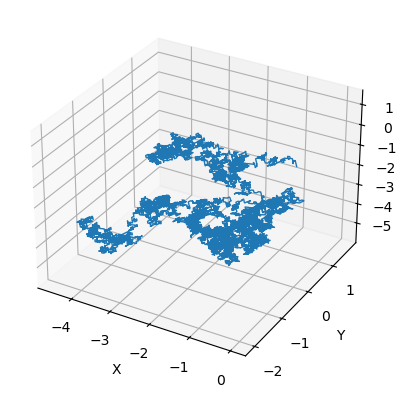

In [240]:
# Gráfica
Grafico = plt.figure() #figura para el grafico
Dim = Grafico.add_subplot(111, projection='3d') 
# Añade una cuadrícula de gráficos a la figura, de una fila, una columna y solo un grafico dentro de la nueva cuadricula (significado del 111)
Dim.plot(x_valor, y_valor, z_valor, lw=1) # Dibuja los valores de x_valor, y_valor, z_valor
Dim.set_xlabel('X')
Dim.set_ylabel('Y')
Dim.set_zlabel('Z')
plt.show()

#### 2. Apuesta arriesgada

Un jugador, con 20 pesos de capital inicial, decide apostar a un volado (con una moneda perfectamente nivelada) la mitad de su capital si éste es mayor o igual a 6 pesos, de lo contrario, solo 2. Esto es, el capital $C_i$ en cada volado $V_i$ se describe como
$$
C_{i+1}=C_i+V_iA_i
$$
donde la apuesta es 
$$
A_i=\left\{\begin{array}{l}
C_i/2,\quad \mbox{si }C_i\geq 6\\
2,\quad \mbox{de lo contrario.}
\end{array}\right.
$$

1. Grafique la evolución del capital hasta quedar en cero.
2. Determine el número de volados promedio para quedar en quiebra usando la simulación montecarlo para 10,000 apostadores.
3. Muestre un histograma del número de volados.

In [184]:
import numpy as np
import matplotlib.pyplot as plt

lista = [] # lista para guardar las listas
moneda = [-1, 1] # Valores de la moneda en lugar de aguila o sello
C0 = 20 # Capital inicial 
apostadores = 10000 # Cantidad de apostadores del problema

for apostador in range(apostadores):
    C0 = 20 # Capital inicial
    historial = [C0] # Permite almacenar como fue cambiando la capital
    
    while C0 > 0: #Se sigue apostando hasta que no tengas capital
        if C0>=6: # Decidir cuanto apostar dependiendo del dinero
            a = C0/2 #Si es mas de 6 se apuesta la mitad
        else:
            a = 2 #Si es menos de 6 se apuesta dos pesos
                
        apuesta = np.random.choice(moneda) # Se pone el resultado del volado, -1 pierdes, mas 1 ganas
        C0+= apuesta * a #Actualiza el capital que se tiene
        historial.append(C0) #Va guardando el historial luego de cada apuesta
    lista.append(historial)

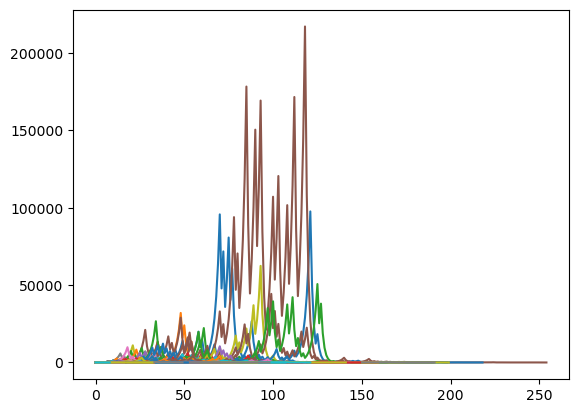

In [185]:
# Gráfica
import matplotlib.pyplot as plt
plt.figure()
for p in range(apostadores):
    plt.plot(lista[p])

In [218]:
# Parte 2
promedio = []
for santiago in range(apostadores):
    longitud = len(lista[santiago]) # Para sacar lo que duro apostando cada apostador
    longitud = longitud-1 #El 20 inicial no se toma en cuenta para este promedio
    promedio.append(longitud) #a la lista "promedio" le añades lo que tardan en llegar a la bancarrota
np.mean(promedio) # Obtengo el promedio de la lista

26.5457

(array([6.870e+03, 2.163e+03, 6.410e+02, 2.300e+02, 6.600e+01, 1.700e+01,
        6.000e+00, 5.000e+00, 1.000e+00, 1.000e+00]),
 array([  5. ,  29.9,  54.8,  79.7, 104.6, 129.5, 154.4, 179.3, 204.2,
        229.1, 254. ]),
 <BarContainer object of 10 artists>)

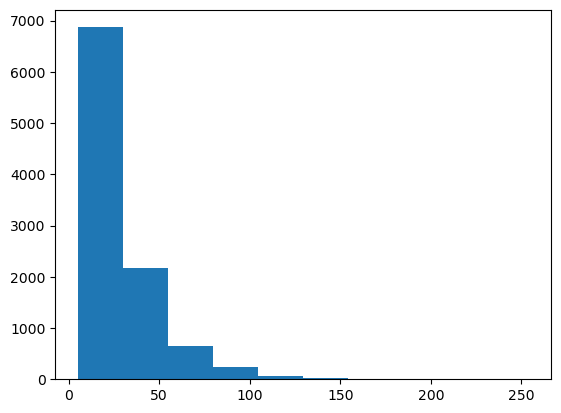

In [220]:
plt.figure()
plt.hist(promedio)